## Trees

## 6.1 Credit Risk Scoring Project 

- Building a model to help banks make a decision if they should lend a customer money or not.

- We need information (features) about the customers

- This is a binary classification model. The two classes are:
    - `NOT_DEFAULT` (0) => The customer will not default
    - `DEFAULT` (1) => The customer will default 
- [Download the dataset](https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv)

## 6.2 Data Cleaning and Preparation

In [100]:
import os 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [101]:
DATASET_PATH = "dataset/CreditScoring.csv"
df = pd.read_csv(DATASET_PATH)

In [102]:
df.head().T 

,0,1,2,3,4
Status,1,1,2,1,1
Seniority,9,17,10,0,0
Home,1,1,2,1,1
Time,60,60,36,60,36
Age,30,58,46,24,26
Marital,2,3,2,1,1
Records,1,1,2,1,1
Job,3,1,3,1,1
Expenses,73,48,90,63,46
Income,129,131,200,182,107


In [103]:
print(df.columns)

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [105]:
df.shape 

(4455, 14)

In [106]:
df.sample(1).T 

,224
Status,1
Seniority,4
Home,2
Time,60
Age,64
Marital,1
Records,1
Job,4
Expenses,35
Income,150


In [107]:
df.columns = df.columns.str.lower()

In [108]:
df.sample(1).T 

,1074
status,2
seniority,4
home,2
time,60
age,37
marital,2
records,1
job,1
expenses,75
income,116


In [109]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [110]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [111]:
df.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [112]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [113]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [114]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [115]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,3,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,no,fixed,46,107,0,0,310,910


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   int64 
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 487.4+ KB


In [117]:
df.describe().round()

,seniority,time,age,marital,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,2.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,2.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,2.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,5.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [118]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [119]:
df.describe()

,seniority,time,age,marital,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,1.879012,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,0.643748,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,2.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,2.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,2.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,5.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [120]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [121]:
df = df[df.status != "unk"].reset_index(drop=True)

In [122]:
from sklearn.model_selection import train_test_split 

In [123]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [124]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
df["status"].value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [126]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(2672, 14)
(891, 14)
(891, 14)


In [127]:
y_train = (df_train["status"] == "default").astype(int).values 
y_val = (df_val["status"] == "default").astype(int).values 
y_test = (df_test["status"] == "default").astype(int).values 

In [128]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2672,)
(891,)
(891,)


In [129]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [130]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(2672, 13)
(891, 13)
(891, 13)


In [131]:
df["job"].value_counts()

job
fixed        2805
freelance    1024
partime       452
others        171
unk             2
Name: count, dtype: int64

## 6.3 Decision Trees

- Structure of a decision tree
- Training a decision tree
- Overfitting
- Controlling the size of a decision tree

Consider the decision tree below:

<img src="images/decision-tree-1.PNG"/>

In [132]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "partime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [133]:
xi = df_train.iloc[0].to_dict()

In [134]:
assess_risk(xi)

'ok'

In [135]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction import DictVectorizer 
from sklearn.metrics import roc_auc_score, roc_curve 

In [136]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [137]:
train_dicts = df_train.to_dict(orient="records")

In [138]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [139]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [141]:
y_val_pred = dt.predict_proba(X_val)

In [142]:
print(y_val.shape, y_val_pred.shape)

(891,) (891, 2)


In [143]:
y_val_pred 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [144]:
y_val_pred = y_val_pred[:, 1]

In [145]:
roc_auc_score(y_val, y_val_pred)

0.665450703543145

In [146]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_train_pred)

1.0

- Overfitting detected!

- This occurs because the tree for representing the data is very deep. Hence, it learns specific rules from the train dataset and fails to generalize on unseen samples.

- A decision tree with one level is called a **DECISION STUMP**.

In [147]:
# Reducing the depth of the tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [149]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f"Training score for max_depth={3}: {auc:.4f}")

y_val_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation score for max_depth={3}: {auc:.4f}")

Training score for max_depth=3: 0.7761
Validation score for max_depth=3: 0.7389


In [150]:
max_depth = 1
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(X_train, y_train)

y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f"Training score for max_depth={max_depth}: {auc:.4f}")

y_val_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation score for max_depth={max_depth}: {auc:.4f}")

Training score for max_depth=1: 0.6283
Validation score for max_depth=1: 0.6059


In [152]:
from sklearn.tree import export_text 

In [153]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



In [154]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(X_train, y_train)

y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f"Training score for max_depth={max_depth}: {auc:.4f}")

y_val_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation score for max_depth={max_depth}: {auc:.4f}")

Training score for max_depth=2: 0.7055
Validation score for max_depth=2: 0.6685


In [155]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## 6.4 Decision Tree Learning Algorithm

- Finding the best split for one column
- Finding the best split for the entire dataset 
- Stopping criteria
- Decision tree learning algorithm

In [156]:
data = [
    [8000, "default"],
    [2000, "default"],
    [0, "default"],
    [5000, "ok"],
    [5000, "ok"],
    [4000, "ok"],
    [9000, "ok"],
    [3000, "default"]
]

In [158]:
df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example 

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [159]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [160]:
from IPython.display import display 

In [166]:
# Thresholds 
Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    print(T)
    # Left child 
    df_left = df_example[df_example.assets <= T]

    # Right child
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print("\n----------------\n")


0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

----------------

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

----------------

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

----------------

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

----------------

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

----------------

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64

----------------



- We can measure the performance of the decision tree model by computing the misclassification rate of each class

- Misclassification rate is also called **IMPURITY**. It tells us how pure the tree is. We want to make our trees as pure as possible.

Using two variables:

In [171]:
data = [
    [8000, 3000, "default"],
    [2000, 1000, "default"],
    [0, 1000, "default"],
    [5000, 1000, "ok"],
    [5000, 1000, "ok"],
    [4000, 1000, "ok"],
    [9000, 500, "ok"],
    [3000, 2000, "default"]
]

df_example_2 = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example_2 

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [172]:
df_example_2.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [173]:
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
}

In [177]:
for feature, Ts in thresholds.items():
    print(f"Feature: {feature}\n")
    print("---"*20)
    for T in Ts:
        print(T)
        # Left child 
        df_left = df_example[df_example_2[feature] <= T]

        # Right child
        df_right = df_example[df_example_2[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print("\n----------------\n")
    print("---"*20)

Feature: assets

------------------------------------------------------------
0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

----------------

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

----------------

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

----------------

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

----------------

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

----------------

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64

----------------

------------------------------------------------------------
Feature: debt

------------------------------------------------------------
500


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

----------------

1000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,status
0,8000,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64

----------------

2000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,status
0,8000,default


status
default    1.0
Name: proportion, dtype: float64

----------------

------------------------------------------------------------


**Stopping criteria for splitting:**
- Group already pure
- Tree has reached depth limit 
- Group is too small to split

## 6.5 Decision Tree Parameter Tuning 

- Selecting the right `max_depth`
- Selecting the right `min_samples_leaf`

In [180]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [182]:
# None implies that there is no restriction on the tree depth
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_val_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred)

    print(f"Depth: {d} -> AUC: {auc}")

Depth: 1 -> AUC: 0.6058644740984719
Depth: 2 -> AUC: 0.6685264343319367
Depth: 3 -> AUC: 0.7389079944782155
Depth: 4 -> AUC: 0.7612827250490422


Depth: 5 -> AUC: 0.7669377103969388
Depth: 6 -> AUC: 0.7616187546923059
Depth: 10 -> AUC: 0.6742752657964206
Depth: 15 -> AUC: 0.6520185996948488
Depth: 20 -> AUC: 0.6605434598338621
Depth: None -> AUC: 0.645155724007653


The best selection would be `max_depth`=4 because it uses a small tree depth and yields a quite accurate score.

In [194]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]: # Max depth
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: # Minimum number of samples on the leaf node
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_val_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred)

        scores.append((d, s, auc))
        print(f"Depth: {d}, Min samples leaf: {s} -> AUC: {auc}")

Depth: 4, Min samples leaf: 1 -> AUC: 0.7612827250490422
Depth: 4, Min samples leaf: 2 -> AUC: 0.7612827250490422
Depth: 4, Min samples leaf: 5 -> AUC: 0.7612827250490422
Depth: 4, Min samples leaf: 10 -> AUC: 0.7612827250490422
Depth: 4, Min samples leaf: 15 -> AUC: 0.7637257513743916
Depth: 4, Min samples leaf: 20 -> AUC: 0.760910367876777
Depth: 4, Min samples leaf: 100 -> AUC: 0.7559365236976581
Depth: 4, Min samples leaf: 200 -> AUC: 0.7472602988544719
Depth: 4, Min samples leaf: 500 -> AUC: 0.679842459615897
Depth: 5, Min samples leaf: 1 -> AUC: 0.7664957254607541
Depth: 5, Min samples leaf: 2 -> AUC: 0.7664957254607541
Depth: 5, Min samples leaf: 5 -> AUC: 0.7681728463829891
Depth: 5, Min samples leaf: 10 -> AUC: 0.7622756775084158
Depth: 5, Min samples leaf: 15 -> AUC: 0.7727228693904241
Depth: 5, Min samples leaf: 20 -> AUC: 0.7740276331403937
Depth: 5, Min samples leaf: 100 -> AUC: 0.7633836671429609
Depth: 5, Min samples leaf: 200 -> AUC: 0.7590728003681189
Depth: 5, Min sam

In [197]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_leaf", "auc"])
df_scores

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726
...,...,...,...
67,NaN,15,0.787187
68,NaN,20,0.783564
69,NaN,100,0.779725
70,NaN,200,0.768479


In [198]:
df_scores.sort_values(by="auc", ascending=False)

,max_depth,min_samples_leaf,auc
40,10.0,15,0.788159
67,NaN,15,0.787187
58,20.0,15,0.786894
41,10.0,20,0.785316
22,6.0,15,0.785080
...,...,...,...
8,4.0,500,0.679842
45,15.0,1,0.661464
36,10.0,1,0.657577
54,20.0,1,0.652143


In [199]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["auc"])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.651  0.761  0.766  0.751  0.746  0.658  0.661  0.652
2                 0.687  0.761  0.766  0.765  0.760  0.724  0.689  0.686
5                 0.724  0.761  0.768  0.762  0.754  0.727  0.716  0.722
10                0.768  0.761  0.762  0.778  0.764  0.768  0.766  0.771
15                0.787  0.764  0.773  0.785  0.780  0.788  0.785  0.787
20                0.784  0.761  0.774  0.773  0.780  0.785  0.784  0.785
100               0.780  0.756  0.763  0.776  0.780  0.780  0.779  0.779
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

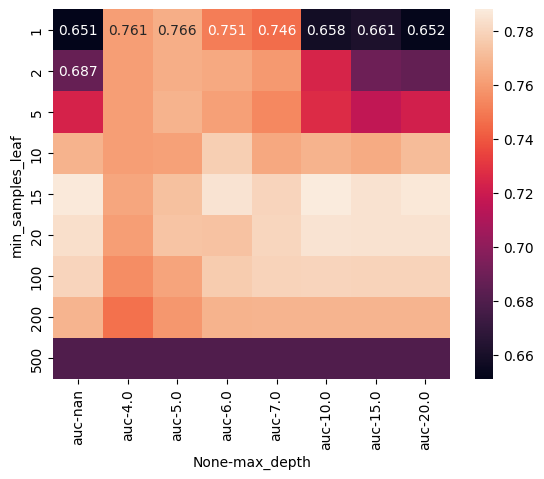

In [200]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [201]:
# Using the best model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and Random Forest 

Random forest is a way of putting multiple trees together

Here, we will discuss:
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees 
- Tuning random forest 

In [202]:
from sklearn.ensemble import RandomForestClassifier 

In [207]:
# We need to set the random state via `random_state` to ensure
# that we get consistent results.
rf = RandomForestClassifier(n_estimators=20, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [208]:
y_val_pred = rf.predict_proba(X_val)[:, 1]

In [209]:
roc_auc_score(y_val, y_val_pred)

0.7974770531108474

Other useful parameters:
- `max_features`
- `bootstrap`

Tuning

In [211]:
# Tuning for n_estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_val_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred)
    scores.append((n, auc))

In [212]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])
df_scores 

,n_estimators,auc
0,10,0.781251
1,20,0.800168
2,30,0.802412
3,40,0.804906
4,50,0.807540
5,60,0.810464
6,70,0.812153
7,80,0.812614
8,90,0.814381
9,100,0.814905


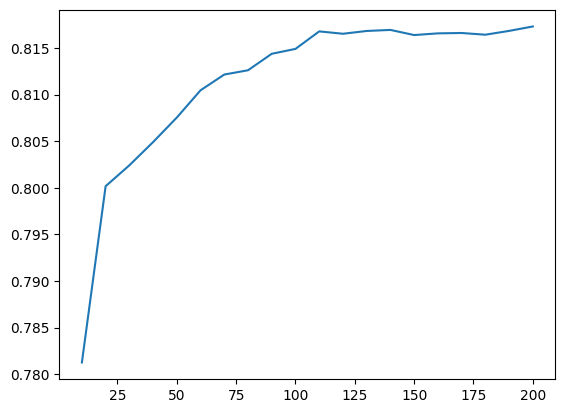

In [213]:
plt.plot(df_scores["n_estimators"], df_scores["auc"])

In [214]:
df_scores.sort_values(by="auc", ascending=False)

,n_estimators,auc
19,200,0.817312
13,140,0.816943
18,190,0.816837
12,130,0.816831
10,110,0.816785
16,170,0.816613
15,160,0.816573
11,120,0.816531
17,180,0.816428
14,150,0.816392


In [215]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=d,
            random_state=1
        )
        rf.fit(X_train, y_train)

        y_val_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred)
        scores.append((d, n, auc))

In [216]:
columns = ["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.795646
1,5,20,0.795773
2,5,30,0.801746
3,5,40,0.802212
4,5,50,0.803486


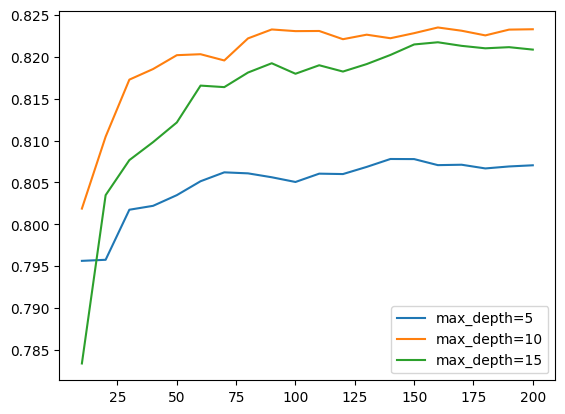

In [217]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")

plt.legend()

In [218]:
best_max_depth = 10

In [234]:
scores = []

for m in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=best_max_depth,
            min_samples_leaf=m,
            random_state=1
        )

        rf.fit(X_train, y_train)

        y_val_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred)
        scores.append((m, n, auc))

In [235]:
columns = ["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head(10)

,min_samples_leaf,n_estimators,auc
0,1,10,0.801882
1,1,20,0.810461
2,1,30,0.817270
3,1,40,0.818535
4,1,50,0.820188
5,1,60,0.820303
6,1,70,0.819558
7,1,80,0.822192
8,1,90,0.823257
9,1,100,0.823058


In [236]:
df_scores.sort_values(by="auc", ascending=False)

,min_samples_leaf,n_estimators,auc
51,5,120,0.824069
50,5,110,0.823736
39,3,200,0.823718
15,1,160,0.823494
52,5,130,0.823415
...,...,...,...
20,3,10,0.802914
60,10,10,0.802233
0,1,10,0.801882
80,50,10,0.800498


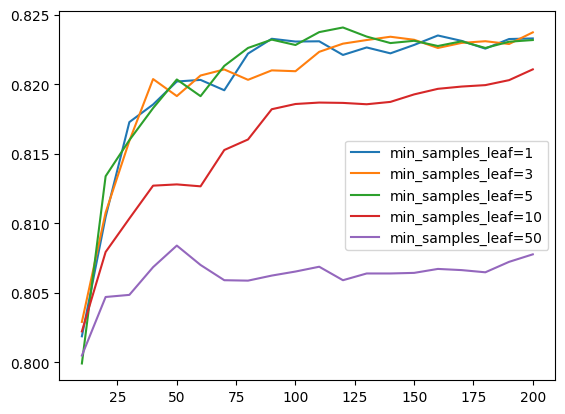

In [237]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for m, color in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == m]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={m}")

plt.legend()

## 6.7 Gradient Boosting and XGBoost

Boosting is an effective method for combining multiple trees into one ensemble.

Here, we will treat:
- Gradient boosting vs. Random Forest 
- Installing XGBoost 
- Training the first model
- Performance monitoring 
- Parsing XGBoost's monitoring output

In [240]:
%pip install -q xgboost

Note: you may need to restart the kernel to use updated packages.


In [241]:
import xgboost as xgb 

In [244]:
features = dv.get_feature_names_out()

# DMatrix is optimized for training XGBoost models
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [247]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, 
    'min_child_weight': 1,
    'objective': 'binary:logistic', # For a binary classification task
    'nthread': 2,
    'seed': 1,
    'verbosity': 1, # Use 0 to hide warnings, Use 2 to show info during training
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [248]:
y_val_pred = model.predict(dval)

roc_auc_score(y_val, y_val_pred)

0.810745683078637

In [251]:
# Evaluate model during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6, 
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=watchlist
)

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90689	val-auc:0.78876
[3]	train-auc:0.91734	val-auc:0.80052
[4]	train-auc:0.92562	val-auc:0.80410
[5]	train-auc:0.93063	val-auc:0.80715
[6]	train-auc:0.93899	val-auc:0.81096
[7]	train-auc:0.94247	val-auc:0.81054
[8]	train-auc:0.94590	val-auc:0.80929
[9]	train-auc:0.94885	val-auc:0.81075
[10]	train-auc:0.95143	val-auc:0.81258
[11]	train-auc:0.95400	val-auc:0.81598
[12]	train-auc:0.95851	val-auc:0.81820


[13]	train-auc:0.96048	val-auc:0.81873
[14]	train-auc:0.96209	val-auc:0.82097
[15]	train-auc:0.96320	val-auc:0.82053
[16]	train-auc:0.96475	val-auc:0.82037
[17]	train-auc:0.96824	val-auc:0.81993
[18]	train-auc:0.96982	val-auc:0.81987
[19]	train-auc:0.97073	val-auc:0.82130
[20]	train-auc:0.97320	val-auc:0.81915
[21]	train-auc:0.97622	val-auc:0.81836
[22]	train-auc:0.97712	val-auc:0.81870
[23]	train-auc:0.97950	val-auc:0.81643
[24]	train-auc:0.98014	val-auc:0.81598
[25]	train-auc:0.98089	val-auc:0.81580
[26]	train-auc:0.98254	val-auc:0.81349
[27]	train-auc:0.98423	val-auc:0.81398
[28]	train-auc:0.98525	val-auc:0.81364
[29]	train-auc:0.98630	val-auc:0.81327
[30]	train-auc:0.98718	val-auc:0.81407
[31]	train-auc:0.98866	val-auc:0.81442
[32]	train-auc:0.98967	val-auc:0.81528
[33]	train-auc:0.99010	val-auc:0.81573
[34]	train-auc:0.99049	val-auc:0.81443
[35]	train-auc:0.99072	val-auc:0.81368
[36]	train-auc:0.99101	val-auc:0.81336
[37]	train-auc:0.99153	val-auc:0.81397
[38]	train-auc:0.99217	va

The model starts overfitting when the training performance is improving and the validation performance is not improving.

## 6.8 XGBoost Parameter Tuning 

Here, we will discuss the tuning of the following parameters:

- `eta` (Learning rate)
- `max_depth`
- `min_child_weight`

- Extract the number of iteration, and train/val scores for each iteration

- Store in a dataframe

- Plot how the scores change for each iteration

- Change the parameters, store the dataframe for each parameter in a dictionary.

i.e. 
```python
scores = {}
scores['eta-1'] = df_eta_1
scores['eta-2'] = df_eta_2
scores['eta-3'] = df_eta_3
```

Other useful parameters include:
- `subsample` and `colsample_bytree`
- `lambda` and `alpha`

## 6.9 Selecting the final model
- Choosing between XGBoost, random forest, and decision tree classifier
- Training the final model
- Saving the model

In [252]:
best_dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=15
)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [255]:
y_val_pred = best_dt_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_val_pred)

0.7852498123077667

In [253]:
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=best_max_depth,
    min_samples_leaf=5,
    random_state=1
)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [256]:
y_val_pred = best_rf_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_val_pred)

0.8231666707030587

In [257]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3, 
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

best_xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=175 
)

In [258]:
y_val_pred = best_xgb_model.predict(dval)
roc_auc_score(y_val, y_val_pred)

0.8315159477852316

Train the best model on the full training dataset and evaluate on the testing dataset.

In [259]:
df_full_train = df_full_train.reset_index(drop=True)

In [260]:
y_full_train = (df_full_train.status == "default").astype(int).values 

In [261]:
del df_full_train["status"]

In [262]:
dicts_full_train = df_full_train.to_dict(orient="records")

In [263]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [264]:
dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [267]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [268]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3, 
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

best_xgb_model = xgb.train(
    xgb_params,
    dfulltrain,
    num_boost_round=175 
)

In [270]:
y_test_pred = model.predict(dtest)

In [271]:
roc_auc_score(y_test, y_test_pred)

0.8250024436733298

## 6.10 Summary
- Decision trees learn if-then-else rules from the data.
- Decision trees can overfit if they are very deep.
- Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and size of the group
- Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions.
- Gradient boosting trains models sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.
